**Import the libraries**

In [79]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [80]:
df = pd.read_csv('/content/height-weight.csv')

In [81]:
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


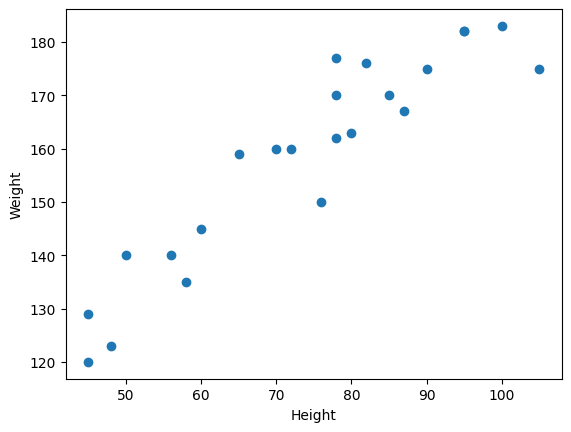

In [83]:
##Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [84]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


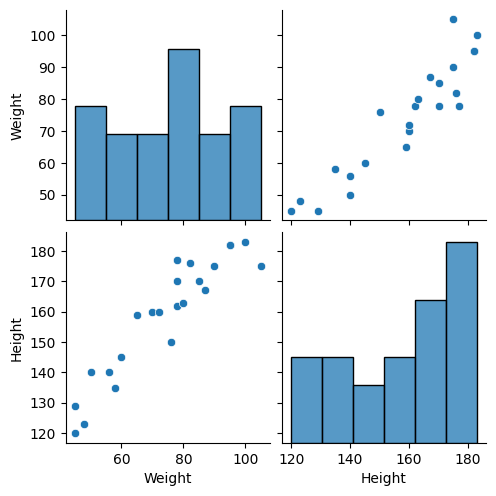

In [85]:
##Pair plot
import seaborn as sns
sns.pairplot(df)

In [88]:
## Independent and dependent varaible
X = df[['Weight']] ### independent Features Should be the Data Frame or 2 Dimesnional Array
Y = df['Height'] ### This variable can be in series Form or 1-D form


In [89]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [90]:
np.array(Y).shape


(23,)

In [91]:
## Train  Test Split
from sklearn.model_selection import train_test_split


In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [94]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [96]:
###Standersization
from sklearn.preprocessing import StandardScaler







In [97]:
sc = StandardScaler()

X_train  = sc.fit_transform(X_train)


In [98]:
X_test = sc.transform(X_test)

In [100]:
## Apply The MAchine Learning Algorithm
from sklearn.linear_model import LinearRegression

In [133]:
lin_reg = LinearRegression(n_jobs=1)

In [102]:
lin_reg.fit(X_train,Y_train)  # in fit  X_train -> should have the 2D, op will be the will -1D

LinearRegression()

In [103]:
lin_reg

LinearRegression()

In [104]:
print("Coefficient or slope :-",lin_reg.coef_)

Coefficient or slope :- [17.2982057]


In [105]:
lin_reg.intercept_

156.47058823529412

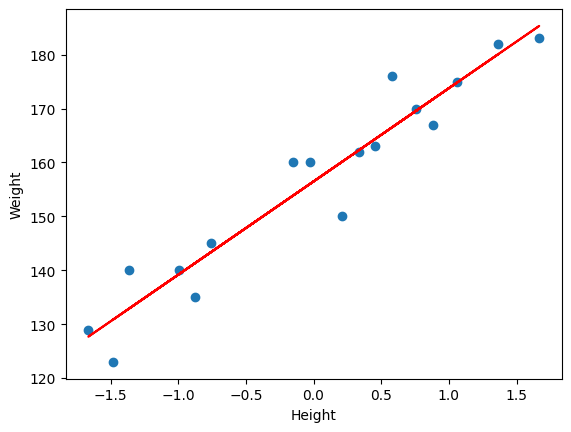

In [106]:
### Plot Training Data Plot Best Fit Line
plt.scatter(X_train,Y_train)
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

###**Preciction of test Data**

predicted height output = intercept + coef_(Weights)

y_pred_test = 17.2982057(X_test) + 156

In [116]:
### Predicttion for the Test Data
y_pred = lin_reg.predict(X_test)

In [117]:
### Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error


In [118]:
mse = mean_squared_error(Y_test,y_pred)

mae = mean_absolute_error(Y_test,y_pred)

rmse = np.sqrt(mse)

print("Mean Squarte Error:-",mse)

print("Mean Absoulte Error:-",mae)


print("RMSE :-",rmse)

Mean Squarte Error:- 114.84069295228699
Mean Absoulte Error:- 9.66512588679501
RMSE :- 10.716374991212605


In [119]:
from sklearn.metrics import r2_score

**R-Square**

Formula

R^2 = 1 - SSR /TSS

TSS = Total Sum of Squares

In [120]:
score = r2_score(Y_test,y_pred)
print("R - Score :-",score)

R - Score :- 0.7360826717981276


Adjusted R^2 =

  1 - [ (1 - R2)*(n-1) / (n-k-1) ]

  where
  R2 = The R2 of the Model
  n = The number of observations
  K = The number of the PRedicted Values

In [121]:
1 - (1-score)* (len(Y_test) -1 ) /(len(Y_test) - X_test.shape[1] -1)


0.6701033397476595

In [122]:
## OLS Technique Linear Regression

In [123]:
import statsmodels.api as sm


In [125]:
model  = sm.OLS(Y_train,X_train).fit()

In [126]:
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [127]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                       0.664
Time:                        05:35:33   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [136]:
### Prediction For new Data
#lin_reg.predict(scaler.transform([[72]]))